# `geopandas`

GeoPandas is a Python Library that extends `pandas` by adding support for geospatial data. In this lesson we will introduce the `geopandas` library to work with the vector data. We will also make our first map.

## Reproducible file paths

In this lesson we will introduce three python packages:

In [9]:
import os 
import geopandas as gpd
import matplotlib.pyplot as plt

In [11]:
fp = os.path.join('data','gbif_sus_scrofa_california','gbif_sus_scrofa_california.shp')
fp

'data/gbif_sus_scrofa_california/gbif_sus_scrofa_california.shp'

We can use this filepath to import the shapefuile using the `geopandas.read_file()` function:

In [12]:
pigs = gpd.read_file(fp)
pigs.head()

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)


In [16]:
fp1 = os.path.join('data','ca_boundary', 'ca_state_boundary.shp')
fp1

ca_boundary =gpd.read_file(fp1)
ca_boundary

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4,9,06,01779778,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183,"MULTIPOLYGON (((-119.63473 33.26545, -119.6363..."


## GeoSeries and GeoDatFrames


`gpd.GeoDataFrame` = `pandas.DataFrame` + geometry column

geometry column = `gpd.GeoSeries` it holds the geometry (point, polygopn, etc) of each spatial feature.
The other columns in the GeoDataFrame are our usaul `panda.Series`

Exaqmple:
Notice the leftmost column of the `pigs` geo-dataframe is a coliumn names `geometry` whose values indicate points:

In [17]:
pigs.head(3)

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)


In [18]:
# Check the data type of the pigs dataframe 
print(type(pigs))

# Check the data type of the geometry column
print(type(pigs.geometry))

# Check the data type of the gbifID column
print(type(pigs.gbifID))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


The datat type of the geometry column is also reflected when we look at the data types of the values in each coluymn:


In [19]:
pigs.dtypes

gbifID           int64
species         object
state           object
individual     float64
day            float64
month          float64
year           float64
inst            object
collection      object
catalogNum      object
identified      object
geometry      geometry
dtype: object

We can also check the type of each element in the geometry column using the `geoma-type` attribute of a `geopandas.GeoDataFrame`:

In [20]:
pigs.geom_type

0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
1041    Point
1042    Point
1043    Point
1044    Point
1045    Point
Length: 1046, dtype: object

## Check in:
What is the geometry type of a single feature in the California state boundary?

In [22]:
ca_boundary.geom_type

0    MultiPolygon
dtype: object

California has islands and is not all contiguous, so it is a MULTI polygon

## CRS and extent

crs = Coordinate reference system and it is one of the most basic information pieces for geospatial data

We can think of the CRS as instructions to locate each spatial feature of our data frame on the surface of the Earth.

In [23]:
# Access the CRS of the GeoDataFrame
pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [27]:
# Get more info about the crs
print('ellipsoid: ', pigs.crs.ellipsoid)
print('datum: ', pigs.crs.datum)
print('is geographic? ', pigs.crs.is_geographic)
print('is projected? ', pigs.crs.is_projected)

ellipsoid:  WGS 84
datum:  World Geodetic System 1984 ensemble
is geographic?  True
is projected?  False


- What are the ellipsoid and datum? What do they tell us about the CRS?
    - The ellipsoid is the abstract shape of the earth, and the datum is the gruid pionts that are plotted on the ellipsoid
    
- What does it mean that the CRS is geographic and not projected?
    - Geographic means that the area is still being considered whole, with areas calculated with angles (lat/long), but projected is a 2D version of the same area, intorducing bias.

he **extent** of the geo-dataframe is the bounding box covering *all* the spatial features in our geo_datframe.
This is formed by finding the points that are furthest W, E, N, S.

In [34]:
# obtain the geographic extent of the geo-dataframe
pigs.total_bounds
pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [36]:
## Check in
print(ca_boundary.total_bounds)
print(ca_boundary.crs)

[-124.48201686   32.52883674 -114.13122248   42.00950827]
epsg:4326


In [35]:
pigs.crs == ca_boundary.crs

True

## Data Wrangling

GeoPandas is convenitently built on top of `pandas`, so we may use everything we have learned about data selection, wrangling, and modification for a `pandas.DatFrame` to wrangle `geopandas.GeoDataFrames`.

### Example

We only want to use refcent data for wild pig observations. A quick check shows that this datframe has data since 1818:

In [38]:
# Examine pig observation by year
pigs['year'].value_counts().sort_index()

1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: year, Length: 61, dtype: int64

In [39]:
# Select data from 2020 onwards
pigs_recent = pigs[pigs.year>=2020]

# Check the length of original datafrmae
print('Total number of observatoins', len(pigs))

# Check length of new dataframe
print('Number of obswrvations since 2020: ', len(pigs_recent))

Total number of observatoins 1046
Number of obswrvations since 2020:  606


## Create a map

geo_dataframes also have a `plot()` method that we can call directly to p[lot data quickly

<AxesSubplot:>

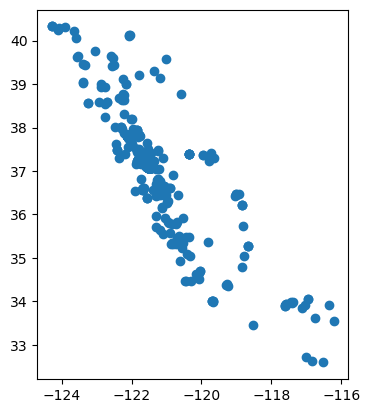

In [41]:
pigs_recent.plot()

## `matplotlib`'s `fig` and `ax`

Matplotlib graphs data ina  **figure** wich can have one or more **axes**

the *axes* are only the area specifeic by the *x* axis and *y* axis and what is plotted in it, while, the figure can include multiple axes in it.

To create anew blank figure:

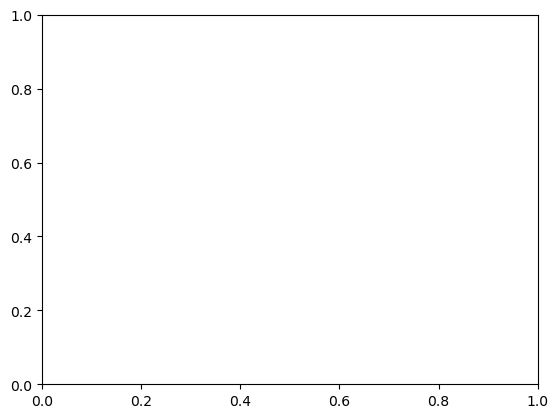

In [42]:
# Initialize an empty figure (fig) and axes (ax)
fig, ax = plt.subplots()

# Display the figure
plt.show()

## Add a layer

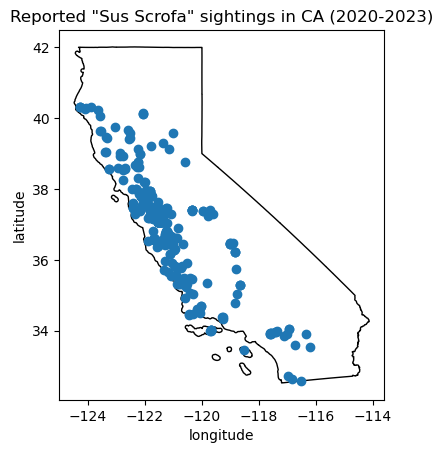

In [44]:
# Initialize an empty figure (fig) and axes (ax)
fig, ax = plt.subplots()


# Add CA boundary
ca_boundary.plot(ax = ax,
                color = 'none', 
                edgecolor = 'black')

# Add pigs point_plot to our figures axis
pigs_recent.plot(ax = ax)


# Customization 
ax.set_title('Reported "Sus Scrofa" sightings in CA (2020-2023)')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')

# Display the figure
plt.show()